# Tarea 2 - Estadística Computacional

- Nombre: Sebastián Jara Cifuentes

Curso: Estadística Computacional

Doctorado en Estadística


Responda las preguntas que se indican colocando el código requerido. El Notebook se entrega totalmente ejecutado.

**Ingrese los Toolbox que se utilizarán en este Jupyter**

In [410]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd


## 1. Estudio de Algoritmos de Ordenamiento

Realizar un estudio comparativo de los tiempos de ejecución requeridos por los algoritmos de ordenamientos, para ordernar listas de elementos con diferentes tamaños. El estudio debe considerar al menos 4 algoritmos de ordenamientos diferentes seleccionados por Ud.

**1.1.-** Implementar una función que genere una lista con $n$ números aleatorios en el rango $a$, $b$. Los parámetros $n, a, b$ son ingresados por el usuario.

In [118]:
def ListRandom(n,a,b):
    L = []
    for i in range(n):
        L.append(np.random.randint(a, b+1))
    return L

**1.2.-** Implementar al menos 4 funciones con algoritmos de ordenamientos diferentes

***Primero algoritmo***

In [131]:
def Ordenar1(datos):
    comienzo = time.time()
    for i in range(len(datos)):
        for j in range(i+1,len(datos)):
            if datos[i] > datos[j]:
                datos[i], datos[j] = datos[j], datos[i]
                #print(datos)
    TiempoEjecucion = time.time() - comienzo 
    #print(TiempoEjecucion)
    return TiempoEjecucion
            

***Segundo algoritmo***

In [141]:
def bubbleSort(datos):
    comienzo = time.time()
    n = len(datos)
    for i in range(n-1):
        for j in range(0,n-i-1):
            if datos[j] > datos[j+1]:
                datos[j], datos[j+1] = datos[j+1], datos[j]
    TiempoEjecucion = time.time() - comienzo 
    #print(TiempoEjecucion)
    return TiempoEjecucion

***Tercer algoritmo***

In [298]:
def merge(arr, l, m, r):
    n1 = m-l+1
    n2 = r-m
    
    L = [0]*n1
    R = [0]*n2
    
    for i in range(0,n1):
        L[i] = arr[l+i]
        
    for j in range(0,n2):
        R[j] = arr[m+1+j]
    
    i = 0
    j = 0
    k = l
    
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k]=R[j]
            j += 1
        k += 1
    
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
    
    
def mergeSort(arr, l, r):
    comienzo = time.time()
    if l < r:
        m = l + (r-l)//2
        mergeSort(arr,l,m)
        mergeSort(arr, m+1, r)
        merge(arr,l,m,r)
    TiempoEjecucion = time.time() - comienzo
    return TiempoEjecucion

**1.3.-** Calcular los tiempos de ejecución requeridos por los métodos para ordenar listas aleatorias de elementos con $n= 10, 100, 1000, 10000, 100000$ elementos.  

***Primer Algoritmo***: Tiempos de Ejecución

In [134]:
lista_n = [10,100,1000,10000,100000]
tiempos = []
for i in lista_n:
    tiempos.append(Ordenar1( ListRandom(i,1,i) ))
print(tiempos)    

[1.2874603271484375e-05, 0.0009751319885253906, 0.09798097610473633, 8.355257987976074, 1073.6002581119537]


***Segundo Algoritmo***: Tiempos de Ejecución

In [142]:
lista_n = [10,100,1000,10000,100000]
tiempos2 = []
for i in lista_n:
    tiempos2.append(bubbleSort(ListRandom(i,1,i)))
print(tiempos2)
    

[2.7894973754882812e-05, 0.001264333724975586, 0.13997793197631836, 12.740594863891602, 1638.4317481517792]


***Tercer Algoritmo***: Tiempos de Ejecución

In [301]:
lista_n = [10,100,1000,10000,100000]
tiempos3 = []
for i in lista_n:
    tiempos3.append(mergeSort(ListRandom(i,1,i),0, len(ListRandom(i,1,i)) - 1))    
print(tiempos3)

[4.506111145019531e-05, 0.0004982948303222656, 0.008529901504516602, 0.07907891273498535, 0.9680769443511963]


**1.4.-** Colcar una tabla comparativa con los resultados, además de un gráfico de $n$ vs $tiempo$.

La siguiente tabla muestra los tiempos de ejecución v/s el tamaño del conjunto que ha sido ordenado

In [413]:
d = [ ["10", 1.2874603271484375e-05, 2.7894973754882812e-05, 4.506111145019531e-05],
     ["100", 0.0009751319885253906, 0.001264333724975586, 0.0004982948303222656],
     ["1000", 0.09798097610473633, 0.13997793197631836, 0.008529901504516602 ],
    ["10000", 8.355257987976074, 12.740594863891602, 0.07907891273498535],
    ["100000", 1073.6002581119537, 1638.4317481517792, 0.9680769443511963]]

df = pd.DataFrame(d, columns = ['Tamaños','Algoritmo Ordenar1','Algoritmo BubbleSort', 'Algoritmo MergeSort'])
print(df)

  Tamaños  Algoritmo Ordenar1  Algoritmo BubbleSort  Algoritmo MergeSort
0      10            0.000013              0.000028             0.000045
1     100            0.000975              0.001264             0.000498
2    1000            0.097981              0.139978             0.008530
3   10000            8.355258             12.740595             0.079079
4  100000         1073.600258           1638.431748             0.968077


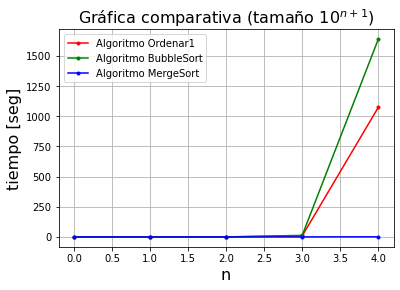

In [403]:
#Comparación n v/s tiempo

fig, ax = plt.subplots()
plt.title('Gráfica comparativa (tamaño $10^{n+1}$)', fontsize=16)
ax.plot( tiempos, 'r.-', label = 'Algoritmo Ordenar1', )
ax.plot( tiempos2, 'g.-', label = 'Algoritmo BubbleSort', )
ax.plot( tiempos3, 'b.-', label = 'Algoritmo MergeSort', )
ax.legend(loc = 'upper left')
#ax.ticklabel_format(style= 'sci',scilimits=(-3,4),axis='both')



plt.xlabel("n", fontsize=16 )
plt.ylabel("tiempo [seg]", fontsize=16)

plt.grid()


**Concluir:** 
Los tres métodos se comportaron de manera similar para tamaños de orden 10000. Sin embargo, MergSort mostró ser el método mas eficiente para ordenar una lista de tamaño 100000.

## 2. Métodos Numéricos

**2.1.** Implementar el método de Halley cuya ecuación de iteración está dada por:

$$g(x) = x - \frac{f(x)}{f'(x)}\left(1 - \frac{f(x)\cdot f''(x)}{2(f'(x))^2} \right)^{-1}$$

Una vez implementada la función, aplicarla para resolver la ecuación:

$$f(x) = x^3 -3x + 2$$

con punto de partida $x_0=2.4$.

***Solución***: La formula presentada puede reescribirse como

$$g(x) = x - \dfrac{2\,f(x)\, f'(x)}{ 2 (f'(x))^2 - f(x)\, f''(x)}$$

Además $f'(x)=3x^2-3$ y $f''(x)=6x$

In [143]:
def f_test(x):
    return x**3 - 3*x + 2

def df_test(x):
    return 3*x**2 - 3

def ddf_test(x):
    return 6*x

In [146]:
def Halley(f, df, ddf, x0, tol = 10**(-8)):
    fm = f(x0)
    x = x0
    k = 0 
    while np.abs(fm) > tol:
        x = x - (2*f(x)*df(x))/(2*(df(x))**2 - f(x)*ddf(x))
        fm = f(x)
        k +=1
        if k > 1000:
            print('no converge')
            break
    print('cantidad de iteraciones:', k)
    return x

In [147]:
Halley(f_test, df_test, ddf_test, 2.4)

cantidad de iteraciones: 10


1.000029520637295

**2.2** El proceso de aceleración de Aitken se utiliza para acelerar el proceso de convergencia de los algoritmos con convergencia lineal.

Dada una secuencia $\{x_n\}_{n=0}^{\infty}$ que converge linealmente a $p$, entonces el proceso de Aitken está dada por:

$$q_{n} = x_n - \frac{(x_{n-1}-x_n)^2}{x_{n-2} - 2x_{n-1} + x_n}$$.

**Problema:** La secuencencia $\{x_n\}$ generada por la iteración de punto fijo $g(x) = \ln(x) + 2$ y partiendo desde $x_0=3.14$ converge linealmente a $p\approx 3.1419322$. Apicar el método de Aitken para encontrar $q_1$, $q_2$ y $q_3$ y de esta forma acelerar la convergencia.

In [167]:
def funciong(x):
    return np.log(x) + 2


suc = []
def Puntofijo(g, x0, tol = 10**(-8)):
    
    suc.append(x0)
    x = x0
    fm = np.abs(g(x)-x)
    k = 0
    while np.abs(fm) > tol:
        x = g(x)
        fm = np.abs(g(x)-x)
        suc.append(x)  #guarda la sucesión de iteraciones hacia la solución
        k +=1
        if k > 1000:
            print('no converge')
            break
    print('cantidad de iteraciones:', k)
    print(suc)
    return x

In [168]:
Puntofijo(funciong, 3.14)

cantidad de iteraciones: 12
[3.14, 3.144222799920162, 3.145566737170702, 3.1459940765158634, 3.146129921772223, 3.146173101231629, 3.1461868257643633, 3.1461911880490687, 3.1461925745788335, 3.1461930152797883, 3.146193155354152, 3.1461931998760106, 3.146193214027036]


3.146193214027036

In [180]:
q = []
for i in [2,3,4]:
    q.append(suc[i] - ((suc[i-1]-suc[i])**2)/(suc[i-2] - 2*suc[i-1] + suc[i]))
print(q)  #Los primeros tres términos que aceleran la convergencia

[3.146194126365903, 3.1461933120965377, 3.146193229861081]


## 3.- Problema de Aplicación:

Un problema clásico de la física elemental es el lanzamiento de un proyectil. Suponiendo que se dispara un proyectil desde el origen con un ángulo $\alpha$ y velocidad inicial $v_0$. La ecuación de movimiento horizontal y vertical de la trayectoria del proyectil, al considerar una resistencia del aire proporcional a la velocidad, viene determinado por el siguiente modelo:

$$
  \begin{array}{cl}
 y(t) &= (Cv_y+9.8C^2)\left(1-e^{-t/C}\right)-9.8Ct\\
 x(t) &= Cv_x\left(1-e^{-t/C}\right)
 \end{array}
$$

donde $C=m/\kappa$, $\kappa$ es el coeficiente de resitencia del aire y $m$ es la masa del proyectil. Además $v_x=v_0 \cos(\alpha)$ y $v_y=v_0 \sin(\alpha)$.

Se dispara el proyectil con un ángulo de elevación de $60°$, velocidades iniciales $v_0=100 [m/s]$ y $C=10$. Determinar el tiempo transcurrido hasta el impacto en el suelo y el alcance del lanzamiento. 

- 3.1. Graficar la trayectoria del proyectil

In [237]:
def x_t(t):
    return 10*100*np.array(np.cos(np.pi/3))*np.array((1-np.array(np.exp(np.array(t)/(-10)))))

In [258]:
def y_t(t):
    return (10*100*np.sin(np.pi/3) + 9.8*(10)**2)*np.array((1-np.array(np.exp(np.array(t)/(-10))))) - 9.8*10*np.array(t)

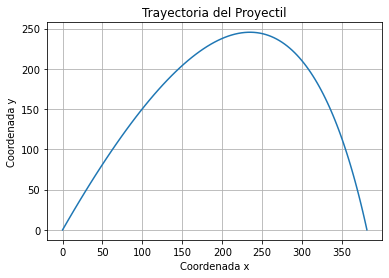

In [290]:
t_test = np.linspace(0,14.35,100)
#t_test
plt.title('Trayectoria del Proyectil')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.plot(x_t(t_test), y_t(t_test), '-')
plt.grid()

- 3.2. Utilizar un método numérico (toolbox) con punto inicial $p_0=14$ y obtener una solución. . Indicar cuántos dígitos significativos tiene la solución.

**Solución:** Queremos resolver la ecuación $$y(t)=0,$$
con $t\neq 0$.

In [277]:
def y(t):
    return (10*100*np.sin(np.pi/3) + 9.8*(10)**2)*(1-np.array(np.exp(np.array(t)/(-10)))) - 9.8*10*t

In [281]:
def dy(t):
    return -10*100*np.sin(np.pi/3)*(-1/10)*np.exp(t/(-10)) + 9.8*10*np.exp(t/(-10))-9.8*10

In [437]:
solucion1 = optimize.root(y,14,jac = dy, method = 'broyden1')
print('El proyectil toca el suelo al cabo de', solucion1.x , 'segundos, aproximadamente.')

El proyectil toca el suelo al cabo de 14.352930484287462 segundos, aproximadamente.


In [376]:
#Dígitos Significativos
t = 8
t_aprox = solucion1.x
epsilon = 0.5*10**(1-t)

# Test del signo
y(t_aprox-epsilon)*y(t_aprox+epsilon)

-6.546378024633241e-12

**Observación:** La aproximación tiene a lo menos ocho dígitos significativos

- 3.3 Aplicar el método de Newton y obtener una solución. Indicar cuántos dígitos significativos tiene la solución.

**Solución:**

In [438]:
def metodo_newton(f,df,x0, tol = 10**(-8)):
    fm = f(x0)
    x = x0
    k = 0 
    while np.abs(fm) > tol:
        x = x - f(x)/df(x)
        fm = f(x)
        k +=1
        if k > 1000:
            print('no converge')
            break
    print('cantidad de iteraciones:', k)
    return x

In [439]:
m = metodo_newton(y, dy, 14)
print('El proyectil toca el suelo al cabo de', m , 'segundos, aproximadamente.')

cantidad de iteraciones: 3
El proyectil toca el suelo al cabo de 14.352930500402064 segundos, aproximadamente.


In [366]:
#Dígitos Significativos
t = 13
t_aprox = metodo_newton(y, dy, 14)
epsilon = 0.5*10**(1-t)

# Test del signo
y(t_aprox-epsilon)*y(t_aprox+epsilon)

cantidad de iteraciones: 3


-7.301936857311852e-22

**Observación:** La aproximación tiene a lo menos trece dígitos significativos